In [2]:
from loadData import loadData
from initAnalysis import initAnalysis
import pandas as pd 
from matplotlib import pyplot as plt
import numpy  as np

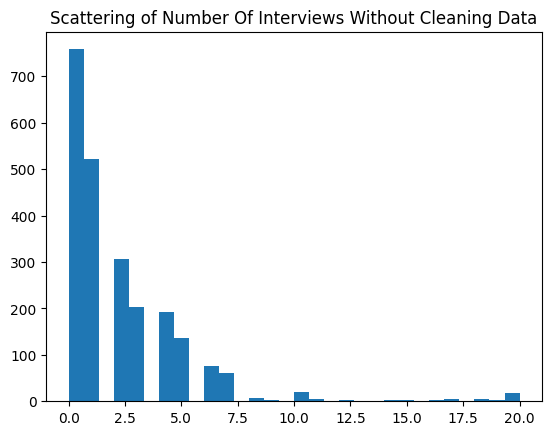

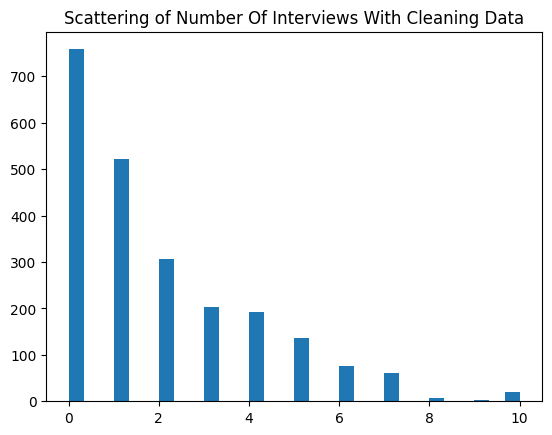

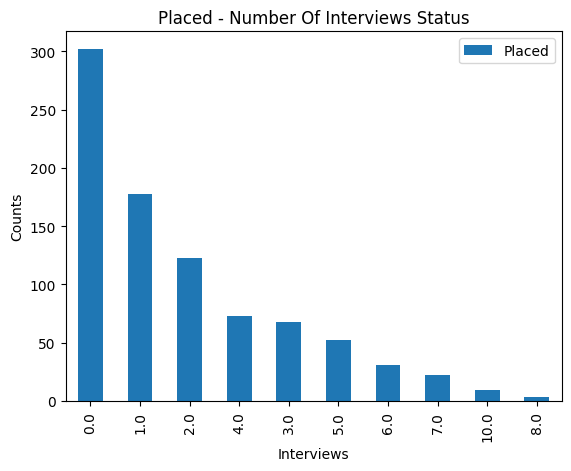

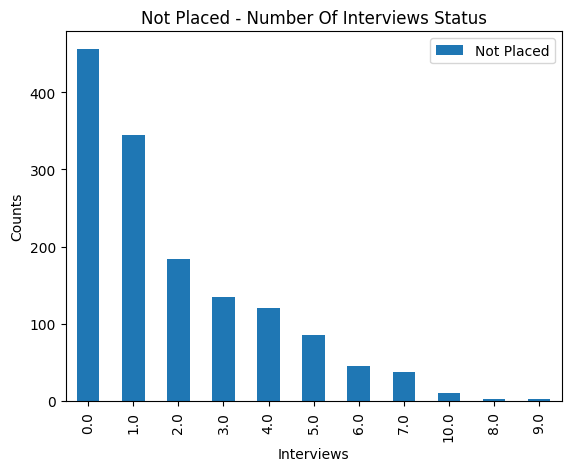

In [13]:
"""
Load data into DataFrame, clean and analyze number of interviews 
for placed and not placed candidates.

Steps:
1. Load data into DataFrame using loadData() function.
2. Prepare Data:
   - Cleaning Data:
     - Drop rows with missing values in 'number_of_interviews'.
     - Plot histogram to visualize distribution of number of interviews without cleaning the data using matplotlib:
       - Title: 'Scattering of Number Of Interviews Without Cleaning Data'
   - Replace values greater than 10 with NaN in 'number_of_interviews' column.
     Drop corresponding rows with missing values in 'number_of_interviews'.
     Plot histogram again to visualize distribution of number of interviews after cleaning the data using matplotlib:
       - Title: 'Scattering of Number Of Interviews With Cleaning Data'
3. End Prepare Data
   - End Cleaning Data

4. Initialize analysis using initAnalysis() function to get targetPlaced, 
   dataPlaced, targetNotPlaced, and dataNotPlaced.
5. Extract 'number_of_interviews' for placed and not placed candidates.
6. Create DataFrame 'numberInterviewsPlacedDataFrame' showing counts of number of interviews 
   for placed candidates and plot a bar chart using matplotlib:
   - X-axis: 'Interviews'
   - Y-axis: 'Counts'
   - Title: 'Placed - Number Of Interviews Status'
7. Create DataFrame 'numberInterviewsNotPlacedDataFrame' showing counts of number of interviews 
   for not placed candidates and plot a bar chart using matplotlib:
   - X-axis: 'Interviews'
   - Y-axis: 'Counts'
   - Title: 'Not Placed - Number Of Interviews Status'

Note: Requires matplotlib and pandas libraries to be imported.
"""

# Load data into DataFrame
dataFrame = loadData()

# Prepare Data
# Cleaning Data

# Drop rows with missing values in "number_of_interviews"
dataFrame = dataFrame.dropna(subset=["number_of_interviews"])
# Plot histogram to visualize distribution of number of interviews without cleaning the data
plt.title('Scattering of Number Of Interviews Without Cleaning Data')
plt.hist(dataFrame["number_of_interviews"], bins=30)
plt.show()

# Replace values greater than 10 with NaN and drop corresponding rows
dataFrame["number_of_interviews"] = np.where(dataFrame["number_of_interviews"] > 10, np.nan, dataFrame["number_of_interviews"])
dataFrame = dataFrame.dropna(subset=["number_of_interviews"])
# Plot histogram to visualize distribution of number of interviews after cleaning the data
plt.title('Scattering of Number Of Interviews With Cleaning Data')
plt.hist(dataFrame["number_of_interviews"], bins=30)
plt.show()

# End Prepare Data
# End Cleaning Data

# Initialize analysis
targetPlaced, dataPlaced, targetNotPlaced, dataNotPlaced = initAnalysis(dataFrame)

# Extract number of interviews for placed and not placed groups
numberInterviewsPlaced = dataPlaced["number_of_interviews"]
numberInterviewsNotPlaced = dataNotPlaced["number_of_interviews"]

# Create DataFrame for placed candidates and plot bar chart
numberInterviewsPlacedDataFrame = pd.DataFrame({
    'Placed': numberInterviewsPlaced.value_counts(),
})
numberInterviewsPlacedDataFrame.plot(kind='bar')
plt.xlabel('Interviews')
plt.ylabel('Counts')
plt.title('Placed - Number Of Interviews Status')
plt.show()

# Create DataFrame for not placed candidates and plot bar chart
numberInterviewsNotPlacedDataFrame = pd.DataFrame({
    'Not Placed': numberInterviewsNotPlaced.value_counts()
})
numberInterviewsNotPlacedDataFrame.plot(kind='bar')
plt.xlabel('Interviews')
plt.ylabel('Counts')
plt.title('Not Placed - Number Of Interviews Status')
plt.show()
